In [6]:
from google.colab import files
import pandas as pd
import warnings
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
warnings.filterwarnings('ignore')

In [7]:
uploaded = files.upload()
filename = next(iter(uploaded))

Saving pima-indians-diabetes.csv to pima-indians-diabetes (1).csv


In [8]:
diabetes_df = pd.read_csv(filename)

In [9]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancy                 768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPreasure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insuline                  768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
diabetes_df

,Pregnancy,Glucose,BloodPreasure,SkinThickness,Insuline,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
X = diabetes_df.drop(['Outcome'], axis=1)
y = diabetes_df.Outcome

In [12]:
X

,Pregnancy,Glucose,BloodPreasure,SkinThickness,Insuline,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [13]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [14]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [15]:
clf_train = clf.fit(X, y)

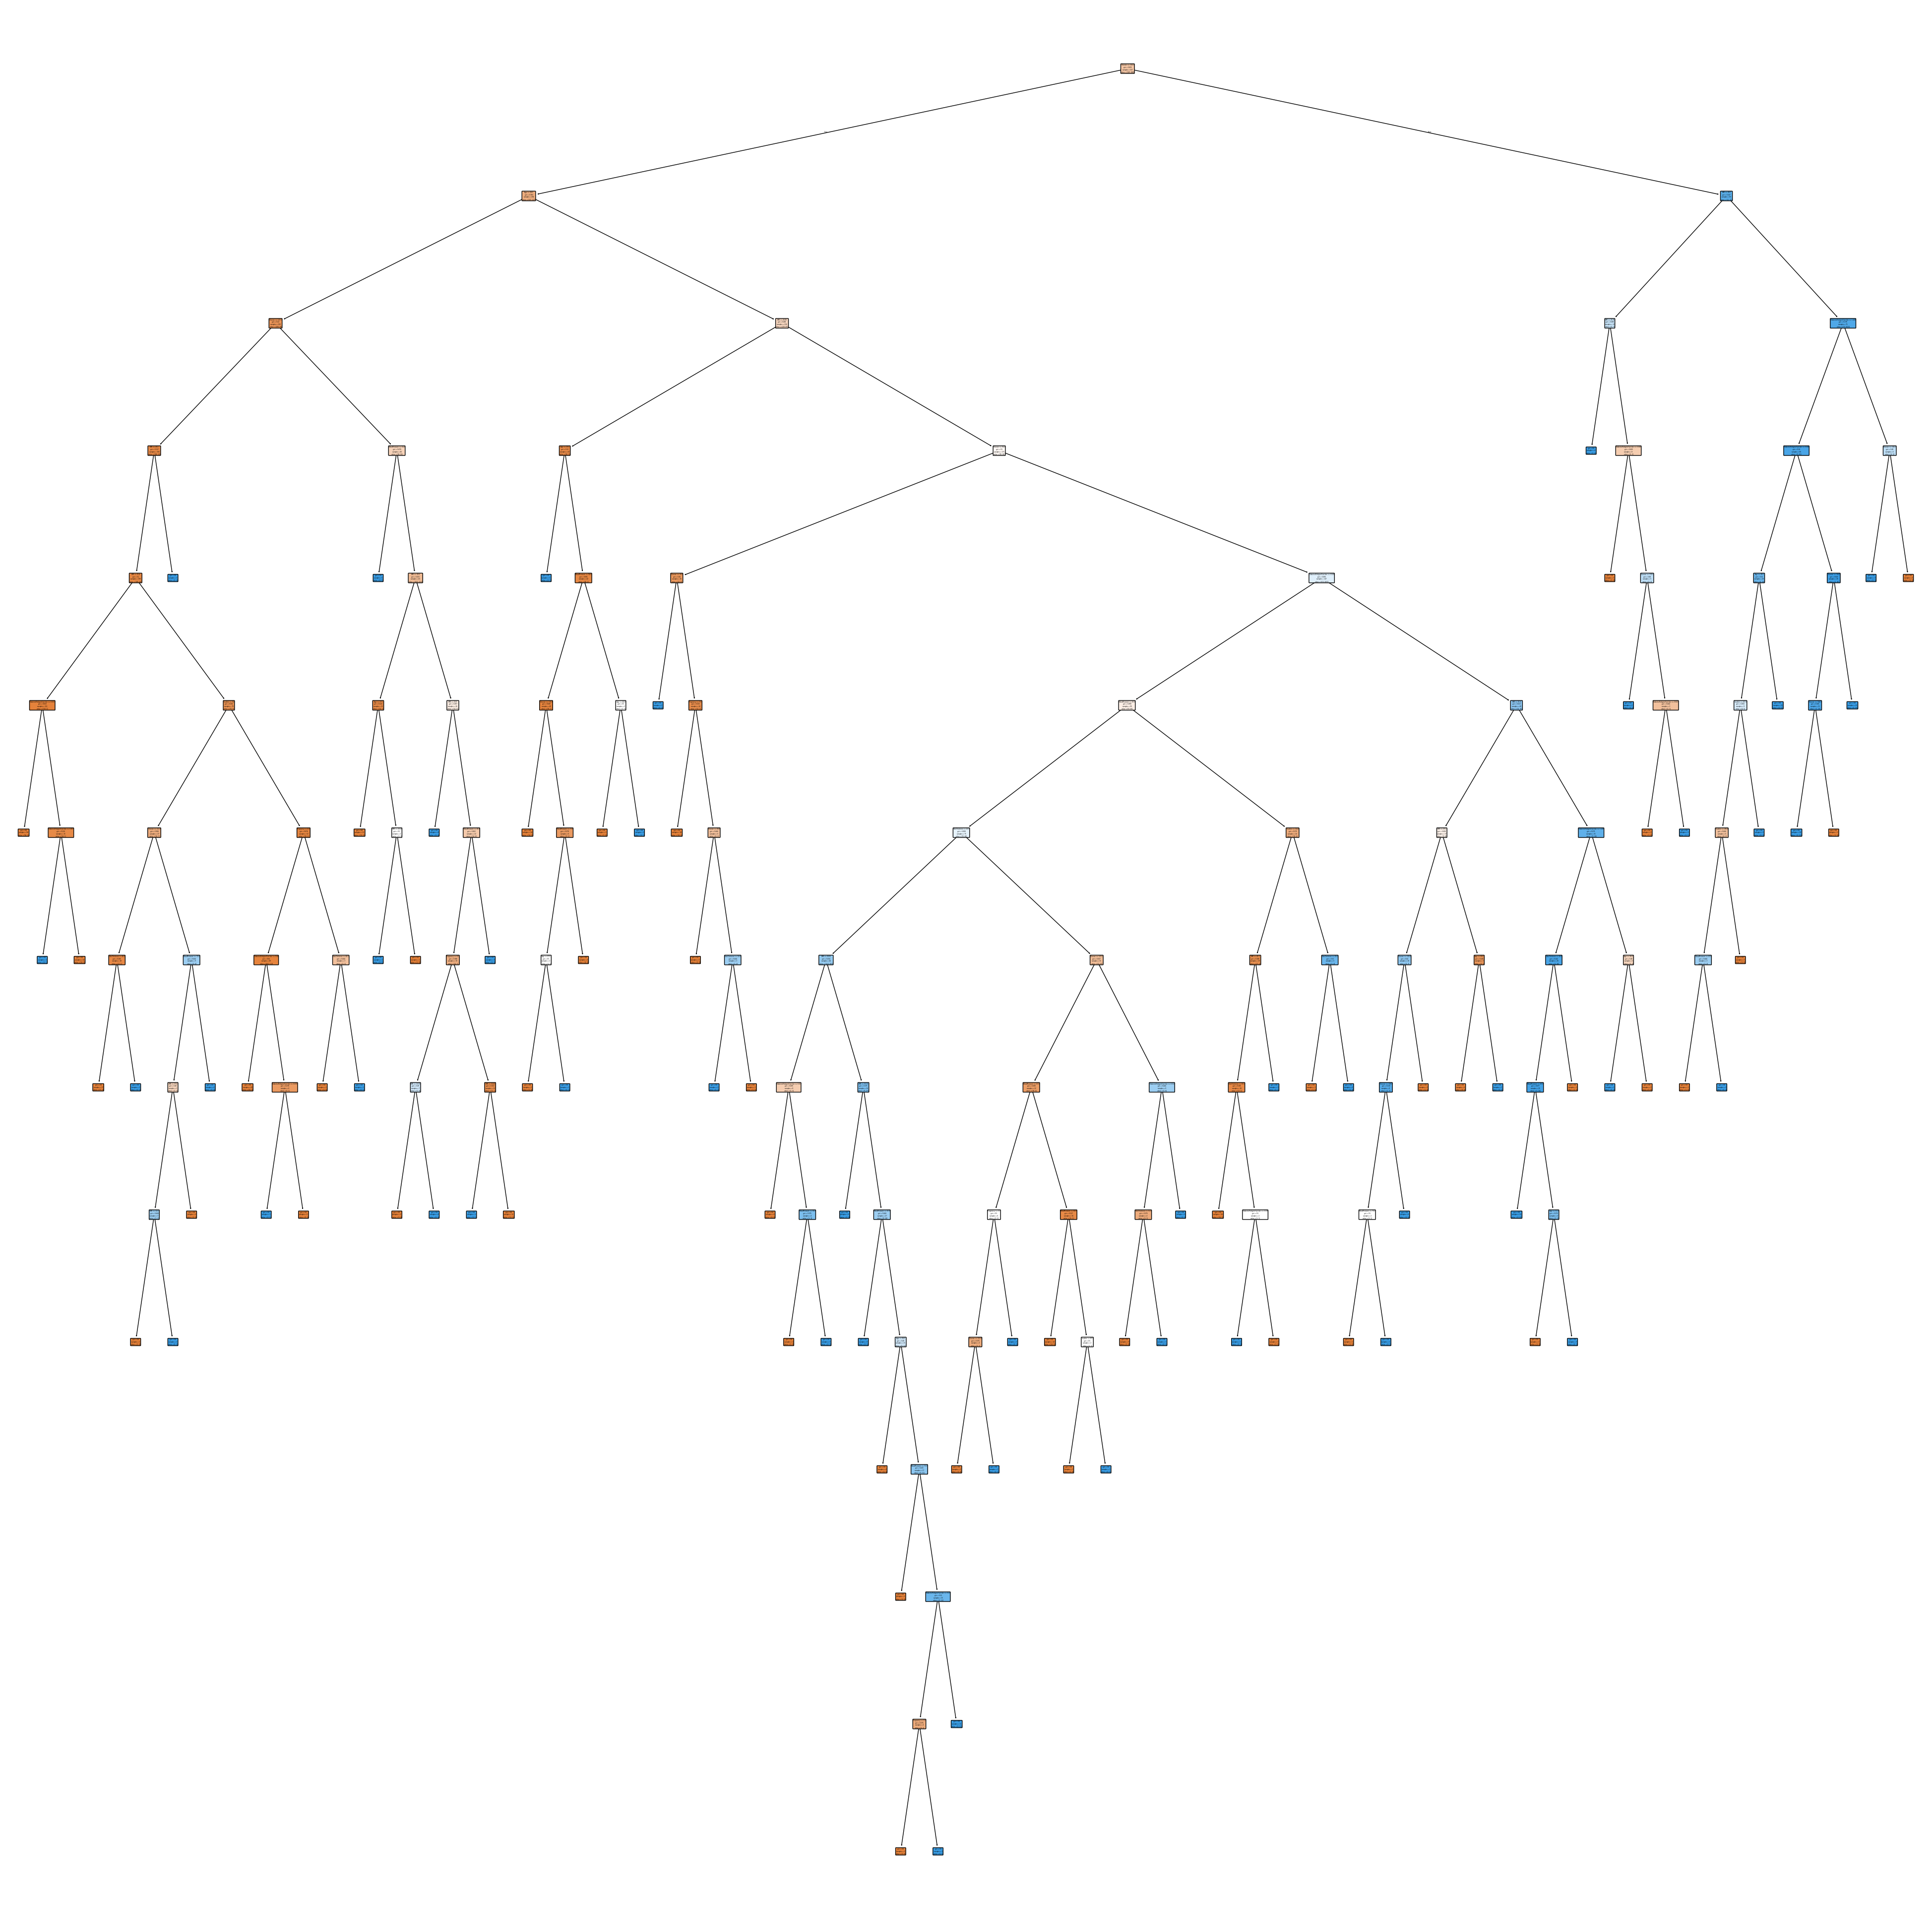

In [24]:
plt.figure(figsize=(50, 50))
plot_tree(clf_train, filled=True, rounded=True, fontsize=2, feature_names=X.columns)
plt.savefig('out_diabetes.pdf')

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
clf = DecisionTreeClassifier(random_state=42)
clf_train = clf.fit(X_train, y_train)

In [27]:
y_pred = clf.predict(X_test)

In [28]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Accuracy: 0.683982683982684
Precision: 0.5204081632653061
Recall: 0.6623376623376623
F1 Score: 0.5828571428571429


In [29]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[107  47]
 [ 26  51]]
